In [37]:
import pickle
import numpy as np
import cv2
import glob

import namespace
import converter
import predictor
import metric_map

reload(namespace)
reload(converter)
reload(predictor)
reload(metric_map)

from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [24]:
Converter = converter.Converter()
mAP = metric_map.mAP()

In [3]:
#first extract raw annotation from file.
#the raw annotation is just a list of [filename: annotation_for_that_file]
if 'raw_anno' not in locals():
    raw_anno = pickle.load(open(namespace.FILEPATH_IMAGENET_ANNOTATION))


In [4]:
#first functionality, convert raw ground truth annotation
anno, anno_dict = Converter.convert_annotation(raw_anno)

In [5]:
Pred = predictor.Predictor()

ssd/ssd.py:34: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True)


Loading weights into state dict...
Finished!


In [30]:
filepath_list = glob.glob('./test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00021000/*')
y = []
for filepath in filepath_list:
    y.append(mAP.score_from_file(filepath, Converter, Pred, anno_dict))
y = sorted(y)

KeyboardInterrupt: 

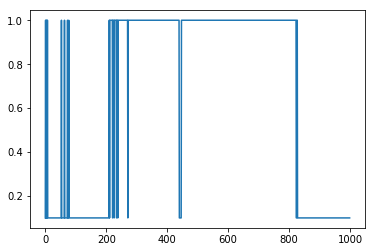

In [46]:
#now, just make a chart to 

plt.plot(y[:1000])

In [43]:
y

[0.1,
 1.0,
 0.1,
 1.0,
 0.1,
 1.0,
 0.1,
 1.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 1.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 1.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 1.0,
 0.1,
 0.1,
 0.1,
 1.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1

(720, 1280, 3)
score:  0.1


[('read file', 0.02000880241394043),
 ('prediction', 0.19714903831481934),
 ('convert predict', 0.02222299575805664),
 ('calc mAP', 0.00026297569274902344)]

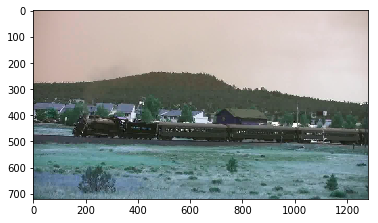

In [47]:
import timeit
time_list = []
#image_filepath = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00003000/000461.JPEG'
#image_filepath = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00016000/000008.JPEG'
image_filepath = './test_ssd/VID_data/ILSVRC2015_VID_train_0000/ILSVRC2015_train_00021000/000100.JPEG'

ftoken = converter.Converter.get_token_from_filepath(image_filepath)
dtoken = converter.Converter.get_dirtoken_from_filetoken(ftoken)

time_list.append(timeit.default_timer())
image = cv2.imread(image_filepath, cv2.IMREAD_COLOR)
time_list.append(timeit.default_timer())
pred = Pred.detect(image)
time_list.append(timeit.default_timer())
pred_item = Converter.convert_prediction_item(pred)
time_list.append(timeit.default_timer())
score =  mAP.score(pred_item, anno_dict[dtoken][ftoken])
time_list.append(timeit.default_timer())
plt.imshow(image)
print image.shape

print 'score: ', score
time_list = np.array(time_list)
zip(('read file', 'prediction', 'convert predict', 'calc mAP'), time_list[1:] - time_list[:-1])

In [52]:
pred, anno_dict[dtoken][ftoken]

(tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
 
          [[0.1781, 0.1146, 0.5154, 0.9678, 0.6947],
           [0.0104, 0.7994, 0.6004, 0.9912, 0.7219],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0

In [33]:
matched_bbox_dict = mAP.step1_match_bbox(pred_item, anno_dict[dtoken][ftoken])
sorted_matched_bbox = mAP.step2_sort_matchedbbox(matched_bbox_dict, pred_item, anno_dict[dtoken][ftoken])
pd_list, acc_list, rc_list = mAP.step3_predict_on_sortedmatchedbbox(sorted_matched_bbox, pred_item, anno_dict[dtoken][ftoken])
prcurve = mAP.step4_prcurve_from_accrclist(acc_list, rc_list)
print prcurve

[[0.0, 1.0], [0.1, 1.0], [0.2, 1.0], [0.30000000000000004, 1.0], [0.4, 1.0], [0.5, 1.0], [0.6000000000000001, 1.0], [0.7000000000000001, 1.0], [0.8, 1.0], [0.9, 1.0]]
